Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Darlysson Olímpio Nascimento"
COLLABORATORS = "Darlysson Olímpio Nascimento"

---

In [15]:
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import numpy as np
path = '../Imagens/'

## Introduction


Histogram matching, also known as histogram equalization, is a technique used to adjust the contrast and enhance the overall appearance of an image. With OpenCV, a powerful computer vision library in Python, histogram matching can be easily implemented.

The goal of histogram matching is to modify the intensity distribution of an image to match a specified reference histogram. By aligning the histogram of an image to a desired target histogram, we can achieve a desired image appearance or transfer the visual characteristics from one image to another.

Histogram matching involves several steps, including calculating the histograms of the source and target images, computing cumulative distribution functions, and mapping the intensity values to match the target histogram. By applying these operations, we can effectively adjust the contrast and enhance the visual quality of an image.

For more details, refer to:

[Histogram matching with OpenCV and Python](https://pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/)

### Implement histogram matching by transferring features from one image to another, as exemplified in the referenced link in the introduction. Your function should return the matched image and its histograms of the red, green, and blue channels, respectively, based on the provided images.

See reference:

[skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html)

In [10]:
def match_histograms(image, reference):
    # Equalize histogram
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    reference = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
    image = exposure.equalize_hist(image)
    reference = exposure.equalize_hist(reference)
    # Convert to 8-bit
    image = (image * 255).astype(np.uint8)
    reference = (reference * 255).astype(np.uint8)
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Apply CLAHE
    image = clahe.apply(image)
    reference = clahe.apply(reference)
    # Convert to 8-bit
    image = (image * 255).astype(np.uint8)
    reference = (reference * 255).astype(np.uint8)
    # Create a LUT
    lut = np.zeros(256, dtype=reference.dtype)
    # Create a histogram
    hist_image, _ = np.histogram(image, bins=256, range=[0, 256])
    hist_reference, _ = np.histogram(reference, bins=256, range=[0, 256])
    # Compute the CDF
    cdf_image = hist_image.cumsum()
    cdf_reference = hist_reference.cumsum()
    # Normalize the CDF
    cdf_image = (cdf_image - cdf_image.min()) * 255 / (cdf_image.max() - cdf_image.min())
    cdf_reference = (cdf_reference - cdf_reference.min()) * 255 / (cdf_reference.max() - cdf_reference.min())
    # Create the LUT
    for i in range(256):
        lut[i] = np.argmin(np.abs(cdf_image[i] - cdf_reference))
    # Apply the LUT
    image = cv2.LUT(image, lut)
    return image

In [21]:
def histogram_matching(src, ref):
    """
    Perform histogram matching between a source image and a reference image
    using match_histograms(), and return the matched image and histograms
    for red, green, and blue channels.

    Parameters:
    src (numpy.ndarray): The source image as a NumPy array.
    ref (numpy.ndarray): The reference image as a NumPy array.

    Returns:
    numpy.ndarray: The matched image as a NumPy array.
    tuple: Tuple containing histograms for red, green, and blue channels.
    """
    # YOUR CODE HERE
    matched = match_histograms(src, ref)
    if matched.ndim == 2:
        matched = cv2.cvtColor(matched, cv2.COLOR_GRAY2BGR)
    red_hist = cv2.calcHist([matched], [0], None, [256], [0, 256])
    green_hist = cv2.calcHist([matched], [1], None, [256], [0, 256])
    blue_hist = cv2.calcHist([matched], [2], None, [256], [0, 256])
    return matched, (red_hist, green_hist, blue_hist)

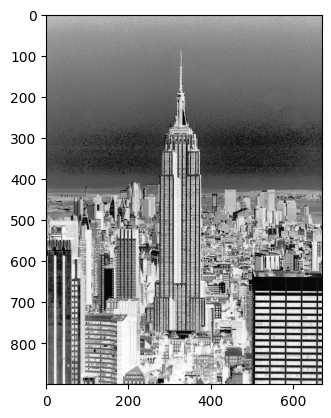

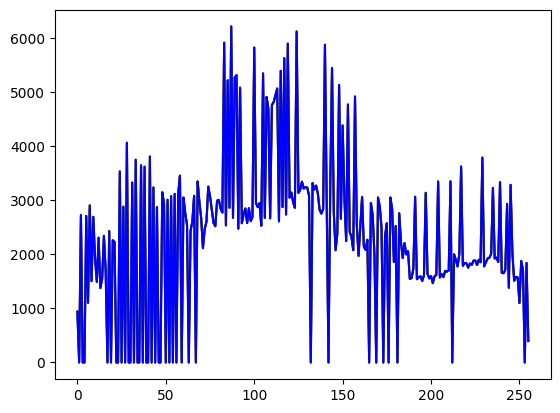

In [24]:
imfile_source = path + 'source.jpg'
imfile_reference = path + 'reference.jpg'
source_image = cv2.imread(imfile_source)
reference_image = cv2.imread(imfile_reference)
result, histograms = histogram_matching(source_image, reference_image)
# Do whatever test you want
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
plt.plot(histograms[0], color='red')
plt.plot(histograms[1], color='green')
plt.plot(histograms[2], color='blue')
plt.show()

In [ ]:
# Do not touch this cell
# Do not touch this cell